### Import Packages and Enable GPU

In [25]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Found GPU at: /device:GPU:0


### Import Data

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

training_rows = 10000
testing_rows = 1000

X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])[0:training_rows, :]
X_test = x_test.reshape(x_test.shape[0], x_train.shape[1] * x_train.shape[2])[0:testing_rows, :]

y_train = y_train[0:training_rows]
y_test = y_test[0:testing_rows]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

### Create Model

In [0]:
model = keras.Sequential()

model.add(keras.layers.Dense(units = 80, input_dim = 784, activation = 'relu'))
model.add(keras.layers.Dense(units = 20, input_dim = 80, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, input_dim = 20, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

### Fit model to training data

In [41]:
model.fit(X_train, y_train, epochs = 1, batch_size = training_rows, verbose = 0)

### Check accuracy of model

1000/1000 [==============================] - 0s 88us/sample - loss: 0.2637 - acc: 0.9150
Accuracy: 91.50
Predicted digit: 7 Actual digit: 7
Probability: 99.11655783653259 percent


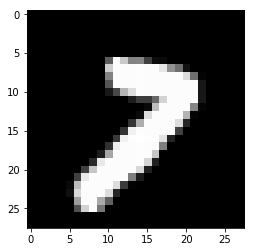

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

rand_image = np.random.choice(a = X_test.shape[0], size = 1, )

pred = model.predict(X_test[rand_image])
print('Predicted digit: ' + str(np.argmax(pred)), 'Actual digit: ' + str(np.argmax(y_test[rand_image])))
print('Probability: ' + str(pred[0, np.argmax(pred)] * 100) + ' percent')
plt.imshow(X_test[rand_image].reshape(28, 28), cmap = 'gray')